In [78]:
#Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
iris = load_iris()

In [27]:
#Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = iris.target

In [28]:
del data['petal length (cm)']

In [29]:
del data['petal width (cm)'] 

In [30]:
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [33]:
#Разделите данные на выборку для обучения и тестирования

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [34]:
#Постройте модель LDA

lda = LinearDiscriminantAnalysis()

In [35]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [36]:
lda.predict(X_test)

array([0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1])

In [39]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head(10)

,0,1
0,0,0
1,2,2
2,1,1
3,2,1
4,1,2
5,2,2
6,0,0
7,1,1
8,2,1
9,0,0


In [46]:
acc = accuracy_score(y_test, lda.predict(X_test))
print('Точность:', round(acc*100,2),'%')

Точность: 76.32 %


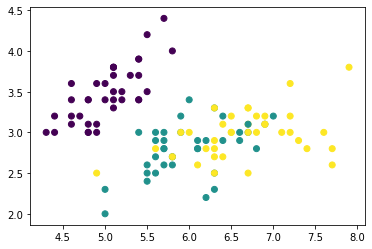

In [50]:
#Визуализируйте предсказания для тестовой выборки и центры классов

plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [53]:
# посмотрим на наши центроиды
lda.means_

array([[5.02162162, 3.47567568],
       [5.9972973 , 2.80540541],
       [6.63684211, 2.96842105]])

In [56]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

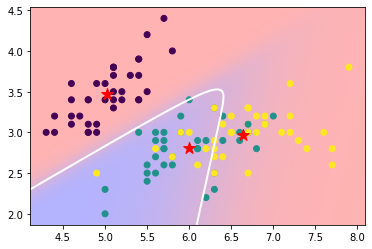

In [57]:
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [58]:
#Пробую взять только 0 и 2 классы

small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

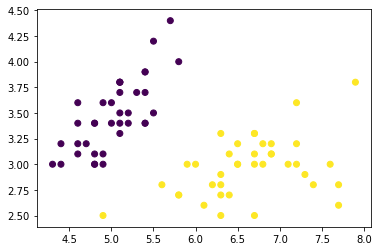

In [59]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [60]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [61]:
lda_small.means_

array([[5.02162162, 3.47567568],
       [6.63684211, 2.96842105]])

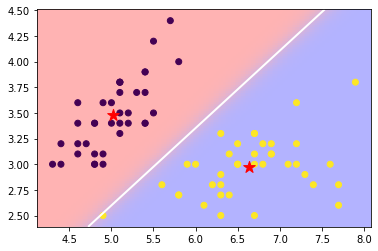

In [62]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [63]:
#ЕСЛИ ЧЕСТНО СЛОЖНО ПОНЯТЬ ЧТО ЗНАЧИТ ДАННОЕ РАЗДЕЛЕНИЕ ПОД ЭТИМ УГЛОМ, МОЖЕТЕ ПОЯСНИТЬ ПЛИЗ ? 

In [66]:
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

Кластеризация

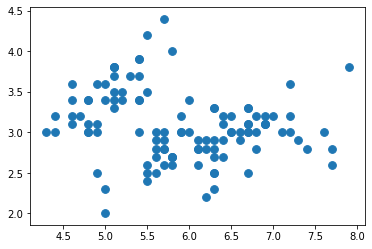

In [69]:

plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], cmap='autumn', s=60)

In [72]:
# приведем данные к единому масштабу

scaler = StandardScaler()

In [73]:
X_scaled = scaler.fit_transform(X_train)

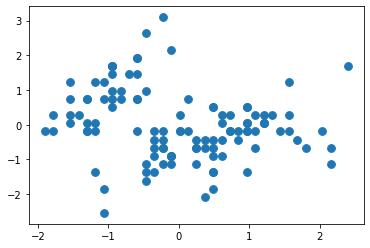

In [77]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [85]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2, 1,
       1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0,
       0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0,
       2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2,
       0, 2])

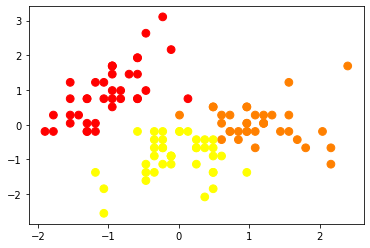

In [86]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [81]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

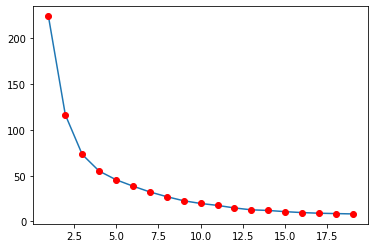

In [82]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [89]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, clusters]).T
result.head(30)

,0,1
0,0.0,1.0
1,2.0,2.0
2,1.0,0.0
3,2.0,1.0
4,1.0,0.0
5,2.0,0.0
6,0.0,1.0
7,1.0,1.0
8,2.0,1.0
9,0.0,1.0
